# Churn Modeling

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

### **Install Pycaret**

In [ ]:
!pip install pycaret

     |████████████████████████████████| 264 kB 32.6 MB/s 
     |████████████████████████████████| 6.8 MB 48.0 MB/s 
     |████████████████████████████████| 271 kB 70.6 MB/s 
     |████████████████████████████████| 248 kB 59.3 MB/s 
     |████████████████████████████████| 1.3 MB 50.8 MB/s 
     |████████████████████████████████| 14.6 MB 127 kB/s 
     |████████████████████████████████| 2.0 MB 50.0 MB/s 
     |████████████████████████████████| 80 kB 10.5 MB/s 
     |████████████████████████████████| 111 kB 57.8 MB/s 
     |████████████████████████████████| 1.7 MB 49.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 5.3 MB/s 
     |████████████████████████████████| 167 kB 57.2 MB/s 
     |████████████████████████████████| 102 kB 59.4 MB/s 
     |████████████████████████████████| 10.1 MB 48.6 MB/s 
     |███████████████

### **Importing the libraries**

In [ ]:
#ImportLib
import warnings
warnings.filterwarnings('ignore')
from pycaret.classification import *
import pandas as pd

### **Load and Prepare Data**

In [ ]:
data = pd.read_csv("Churn.csv")
data.head(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#Drop the unwanted columns
data.drop(['RowNumber','CustomerId','Surname'], axis=1 ,inplace = True)

In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### **Setup Auto-ML Model**

In [ ]:
classification = setup(data= data, target='Exited',
                             remove_outliers=True,
                             normalize=True,
                             normalize_method='robust',
                             silent = True)

,Description,Value
0,session_id,1466
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(10000, 11)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


### **Compare All Auto-ML Models**

In [ ]:
compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8636,0.8298,0.3802,0.7362,0.5009,0.4314,0.4632,0.886
gbc,Gradient Boosting Classifier,0.8633,0.8485,0.4027,0.7170,0.5150,0.4428,0.4681,0.747
lightgbm,Light Gradient Boosting Machine,0.8586,0.8357,0.4285,0.6695,0.5213,0.4434,0.4591,0.177
ada,Ada Boost Classifier,0.8538,0.8323,0.3893,0.6655,0.4904,0.4119,0.4325,0.270
et,Extra Trees Classifier,0.8443,0.8130,0.3411,0.6295,0.4408,0.3599,0.3834,0.793
lr,Logistic Regression,0.8425,0.8180,0.2987,0.6401,0.4062,0.3291,0.3615,0.299
lda,Linear Discriminant Analysis,0.8415,0.8184,0.3236,0.6194,0.4245,0.3429,0.3676,0.036
ridge,Ridge Classifier,0.8368,0.0000,0.1706,0.7028,0.2738,0.2187,0.2898,0.018
knn,K Neighbors Classifier,0.8359,0.7497,0.2921,0.5949,0.3905,0.3086,0.3352,0.239
svm,SVM - Linear Kernel,0.8304,0.0000,0.1530,0.6747,0.2362,0.1830,0.2448,0.038


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1466, verbose=0,
                       warm_start=False)

### **Top-3** **AutoML** **Models**

In [ ]:
top_3 =compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8636,0.8298,0.3802,0.7362,0.5009,0.4314,0.4632,0.881
gbc,Gradient Boosting Classifier,0.8633,0.8485,0.4027,0.7170,0.5150,0.4428,0.4681,0.748
lightgbm,Light Gradient Boosting Machine,0.8586,0.8357,0.4285,0.6695,0.5213,0.4434,0.4591,0.135
ada,Ada Boost Classifier,0.8538,0.8323,0.3893,0.6655,0.4904,0.4119,0.4325,0.271
et,Extra Trees Classifier,0.8443,0.8130,0.3411,0.6295,0.4408,0.3599,0.3834,0.806
lr,Logistic Regression,0.8425,0.8180,0.2987,0.6401,0.4062,0.3291,0.3615,0.043
lda,Linear Discriminant Analysis,0.8415,0.8184,0.3236,0.6194,0.4245,0.3429,0.3676,0.038
ridge,Ridge Classifier,0.8368,0.0000,0.1706,0.7028,0.2738,0.2187,0.2898,0.018
knn,K Neighbors Classifier,0.8359,0.7497,0.2921,0.5949,0.3905,0.3086,0.3352,0.246
svm,SVM - Linear Kernel,0.8304,0.0000,0.1530,0.6747,0.2362,0.1830,0.2448,0.041


### **Create Best Model**

In [ ]:
best_model =compare_models(n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8636,0.8298,0.3802,0.7362,0.5009,0.4314,0.4632,0.853
gbc,Gradient Boosting Classifier,0.8633,0.8485,0.4027,0.7170,0.5150,0.4428,0.4681,0.740
lightgbm,Light Gradient Boosting Machine,0.8586,0.8357,0.4285,0.6695,0.5213,0.4434,0.4591,0.136
ada,Ada Boost Classifier,0.8538,0.8323,0.3893,0.6655,0.4904,0.4119,0.4325,0.272
et,Extra Trees Classifier,0.8443,0.8130,0.3411,0.6295,0.4408,0.3599,0.3834,0.781
lr,Logistic Regression,0.8425,0.8180,0.2987,0.6401,0.4062,0.3291,0.3615,0.044
lda,Linear Discriminant Analysis,0.8415,0.8184,0.3236,0.6194,0.4245,0.3429,0.3676,0.036
ridge,Ridge Classifier,0.8368,0.0000,0.1706,0.7028,0.2738,0.2187,0.2898,0.020
knn,K Neighbors Classifier,0.8359,0.7497,0.2921,0.5949,0.3905,0.3086,0.3352,0.243
svm,SVM - Linear Kernel,0.8304,0.0000,0.1530,0.6747,0.2362,0.1830,0.2448,0.037


In [ ]:
top_3

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=1466, verbose=0,
                        warm_start=False),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=1

In [ ]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1466, verbose=0,
                       warm_start=False)

### **Accuracy Score Top-3 Models**


| Model | Accuracy Score | 
| --- | --- | 
| Gradient Boosting Classifier | 0.8586  |
|LLGBM Classifier | 0.8633 |
| Random Forest Classifier | **0**.**8636** |

### **blending Top-3 Models**

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8707,0.8236,0.3917,0.7833,0.5222,0.4569,0.4937
1,0.8406,0.8035,0.3000,0.6207,0.4045,0.3251,0.3539
2,0.8617,0.8241,0.3750,0.7258,0.4945,0.4236,0.4547
3,0.8647,0.8653,0.4083,0.7206,0.5213,0.4494,0.4740
4,0.8737,0.8182,0.4083,0.7903,0.5385,0.4738,0.5085
5,0.8496,0.7941,0.3083,0.6852,0.4253,0.3528,0.3902
6,0.8707,0.8631,0.4167,0.7576,0.5376,0.4697,0.4982
7,0.8707,0.8524,0.4215,0.7612,0.5426,0.4744,0.5025
8,0.8511,0.7761,0.3306,0.6897,0.4469,0.3730,0.4068
9,0.8825,0.8778,0.4417,0.8281,0.5761,0.5151,0.5495


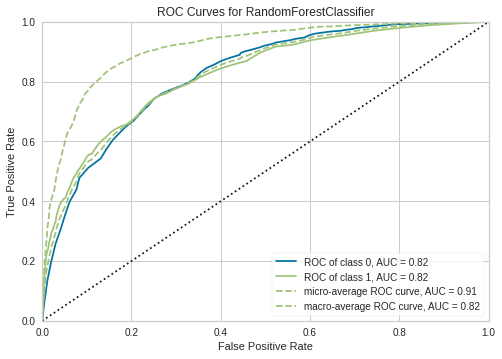

In [ ]:
plot_model(estimator = rf, plot = 'auc')

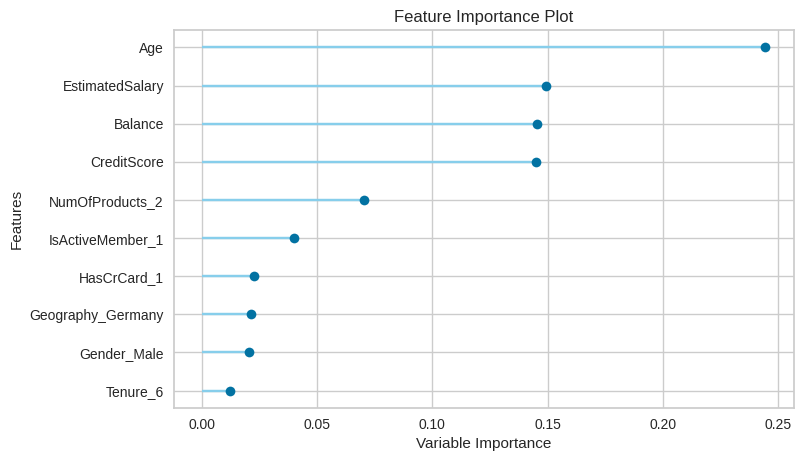

In [ ]:
plot_model(estimator = rf, plot = 'feature')

In [ ]:
gbc = create_model('gbc')     
lgm  = create_model('lightgbm')          
blend = blend_models(estimator_list=[rf,lgm,gbc])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8692,0.8304,0.4083,0.7538,0.5297,0.4614,0.4908
1,0.8466,0.8338,0.3500,0.6364,0.4516,0.3711,0.3935
2,0.8647,0.8418,0.4167,0.7143,0.5263,0.4537,0.4761
3,0.8632,0.8722,0.4333,0.6933,0.5333,0.4581,0.4755
4,0.8752,0.8298,0.4083,0.8033,0.5414,0.4779,0.5147
5,0.8496,0.8228,0.3250,0.6724,0.4382,0.3633,0.3954
6,0.8737,0.8739,0.4333,0.7647,0.5532,0.4861,0.5127
7,0.8737,0.8654,0.4380,0.7681,0.5579,0.4906,0.5169
8,0.8496,0.7963,0.3388,0.6721,0.4505,0.3742,0.4038
9,0.8870,0.8872,0.5000,0.8000,0.6154,0.5533,0.5743


### **Accuracy Score** **Blending Model**



| Model | Accuracy Score | 
| --- | --- | 
| blending Top 3 models | **0**.**8652**  |

### **Confusion Matrix**

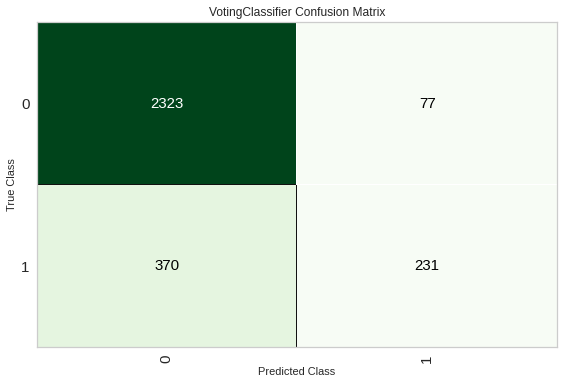

In [ ]:
plot_model(estimator = blend, plot = 'confusion_matrix')

### **Evaluate Blend Model**

In [ ]:
evaluate_model(blend)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### **Make** **Prediction**

In [ ]:
pred = predict_model(blend, data = data)

In [ ]:
pred

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Label,Score
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0.5548
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0.9099
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0.7060
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0.9410
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0.9068
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,0.9788
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,0.9488
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0.8199
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,0.6105


### **Tuned Blend Model**

In [ ]:
tuned_blend = tune_model(blend)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8692,0.8310,0.4000,0.7619,0.5246,0.4571,0.4891
1,0.8451,0.8267,0.3417,0.6308,0.4432,0.3624,0.3854
2,0.8662,0.8381,0.4083,0.7313,0.5241,0.4534,0.4795
3,0.8647,0.8715,0.4083,0.7206,0.5213,0.4494,0.4740
4,0.8812,0.8272,0.4333,0.8254,0.5683,0.5071,0.5425
5,0.8526,0.8175,0.3250,0.6964,0.4432,0.3709,0.4069
6,0.8752,0.8729,0.4333,0.7761,0.5561,0.4902,0.5185
7,0.8722,0.8635,0.4298,0.7647,0.5503,0.4825,0.5098
8,0.8526,0.7912,0.3306,0.7018,0.4494,0.3768,0.4125
9,0.8916,0.8865,0.5083,0.8243,0.6289,0.5695,0.5924


### **Best Accuracy Score!**

| Model | Accuracy Score | 
| --- | --- | 
| Tuned blending Top 3 models | **0**.**8671**  |

### **Evaluate Tuned Model And Make Prediction**

In [ ]:
evaluate_model(tuned_blend) 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
pred_1 = predict_model(tuned_blend, data = data)

In [ ]:
pred_1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Label,Score
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0.5122
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0.9094
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0.6343
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0.9479
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0.8898
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,0.9817
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,0.9497
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0.8011
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,0.5265


### **Save And Load Best Model**

In [ ]:
save_model(tuned_blend, model_name='Navid-Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Exited',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                                           min_samples_leaf=1,
                                                                           min_samples_split=2,
                                                                           min_weig

In [ ]:
NavidModel = load_model('Navid-Model')

Transformation Pipeline and Model Successfully Loaded


## Send us the Result (Maktabkhoone)

<img src = https://linguaholic.com/linguablog/wp-content/uploads/2021/01/Thank-you-for-your-attention-Meaning-Usage-Scope.jpg.webp width=50%>

<img src = https://logos.textgiraffe.com/logos/logo-name/Navid-designstyle-kiddo-m.png width=50%>